## Exploratory Data Analysis and Visualization

In [107]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [94]:
aviation = pd.read_csv('../Data/AviationFinal.csv')
aviation.head()

,WeatherCondition,BroadPhaseOfFlight,AircraftDamage,InvestigationType,PurposeOfFlight,EngineType,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjuries,EventDate,Month,Year
0,UNK,MANEUVERING,Substantial,Accident,Unknown,Turbo Shaft,0.0,0.0,0.0,1.0,0.0,2016-11-14,11,2016
1,VMC,LANDING,Substantial,Accident,Unknown,Unknown,0.0,0.0,0.0,2.0,0.0,2016-11-14,11,2016
2,VMC,TAKEOFF,Substantial,Accident,Personal,Reciprocating,0.0,0.0,0.0,1.0,0.0,2016-11-13,11,2016
3,VMC,MANEUVERING,Substantial,Accident,Instructional,Reciprocating,0.0,0.0,0.0,2.0,0.0,2016-12-11,12,2016
4,VMC,UNKNOWN,Substantial,Accident,Personal,Reciprocating,0.0,1.0,0.0,1.0,1.0,2016-12-11,12,2016


In [95]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 14 columns):
WeatherCondition        79141 non-null object
BroadPhaseOfFlight      79141 non-null object
AircraftDamage          79141 non-null object
InvestigationType       79141 non-null object
PurposeOfFlight         79141 non-null object
EngineType              79141 non-null object
TotalFatalInjuries      79141 non-null float64
TotalSeriousInjuries    79141 non-null float64
TotalMinorInjuries      79141 non-null float64
TotalUninjured          79141 non-null float64
TotalInjuries           79141 non-null float64
EventDate               79141 non-null object
Month                   79141 non-null int64
Year                    79141 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 8.5+ MB


### Count plots for categorical data

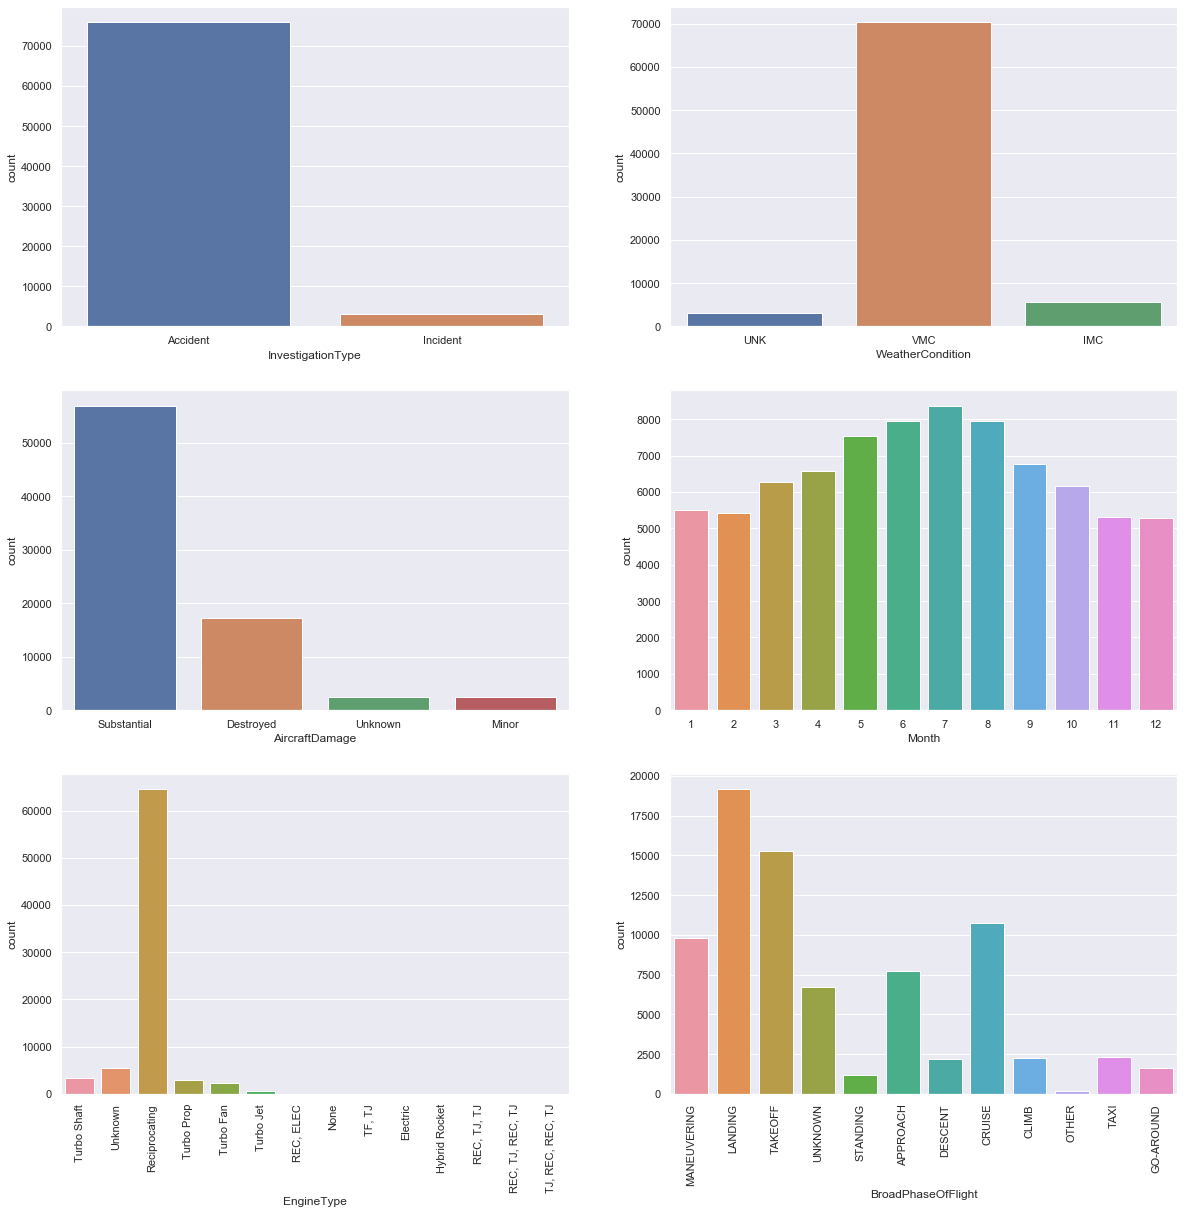

In [96]:
f, axes = plt.subplots(3, 2, figsize=(20,20))

sb.countplot(x='InvestigationType',data=aviation, ax=axes[0,0])
sb.countplot(x='WeatherCondition',data=aviation, ax=axes[0,1])
engine = sb.countplot(x='EngineType',data=aviation, ax=axes[2,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.countplot(x='BroadPhaseOfFlight',data=aviation, ax=axes[2,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.countplot(x='AircraftDamage',data=aviation, ax=axes[1,0])
sb.countplot(x='Month',data=aviation, ax=axes[1,1])

### Strip plots showing Total Injuries by categorical values

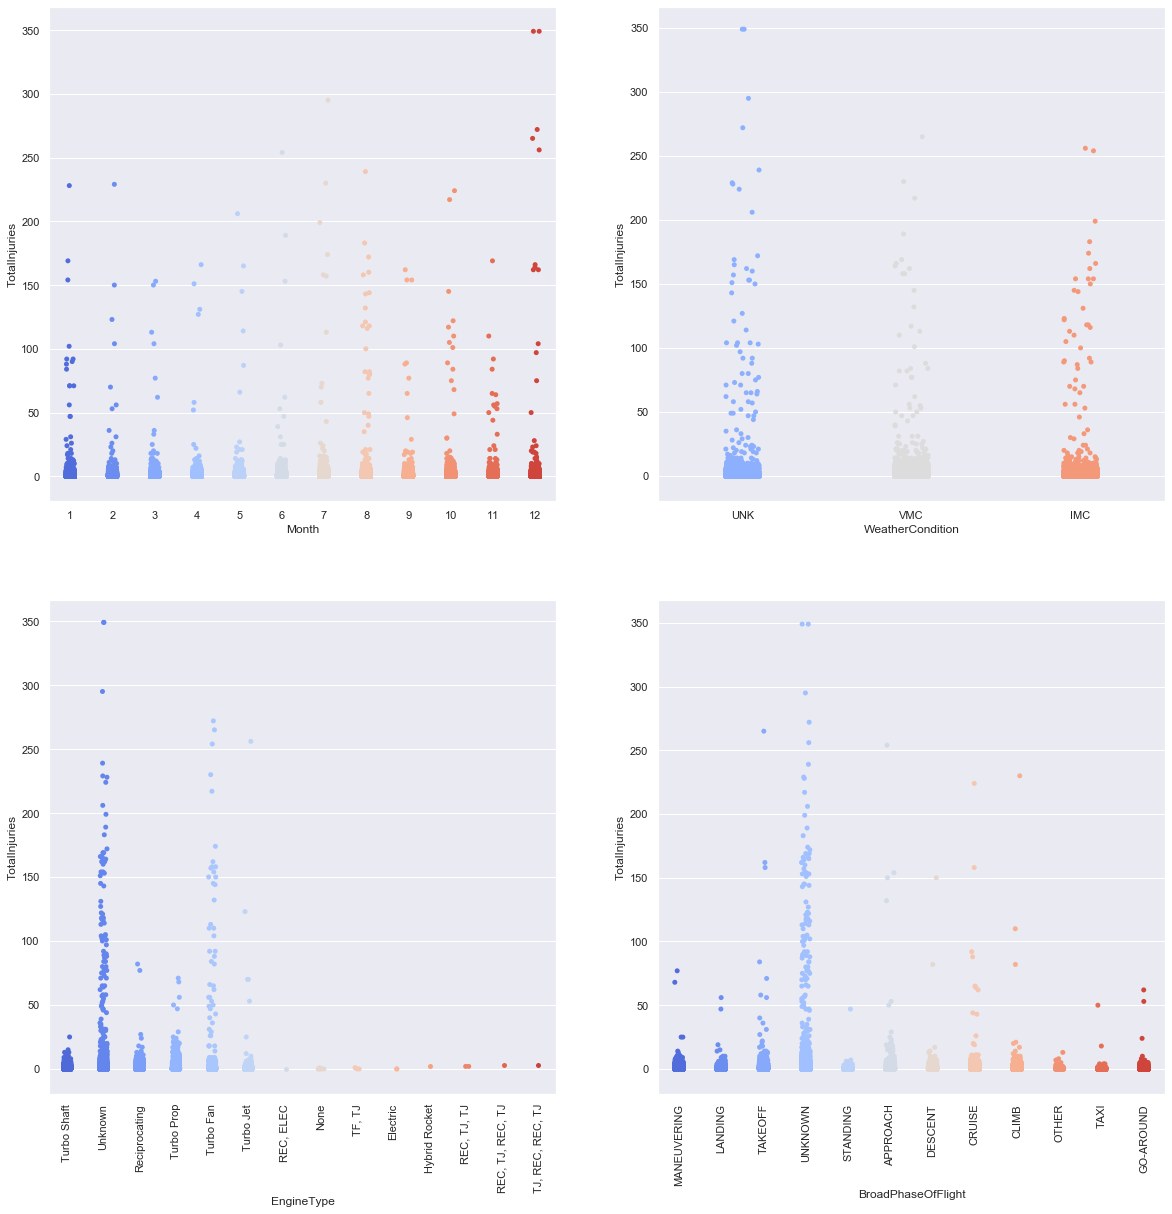

In [97]:
f, axes = plt.subplots(2, 2, figsize=(20,20))
engine = sb.stripplot(x="EngineType",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.stripplot(x="BroadPhaseOfFlight",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,0])
sb.stripplot(x="WeatherCondition",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,1])

### Strip plots showing total injuries based on time and aircraft damage

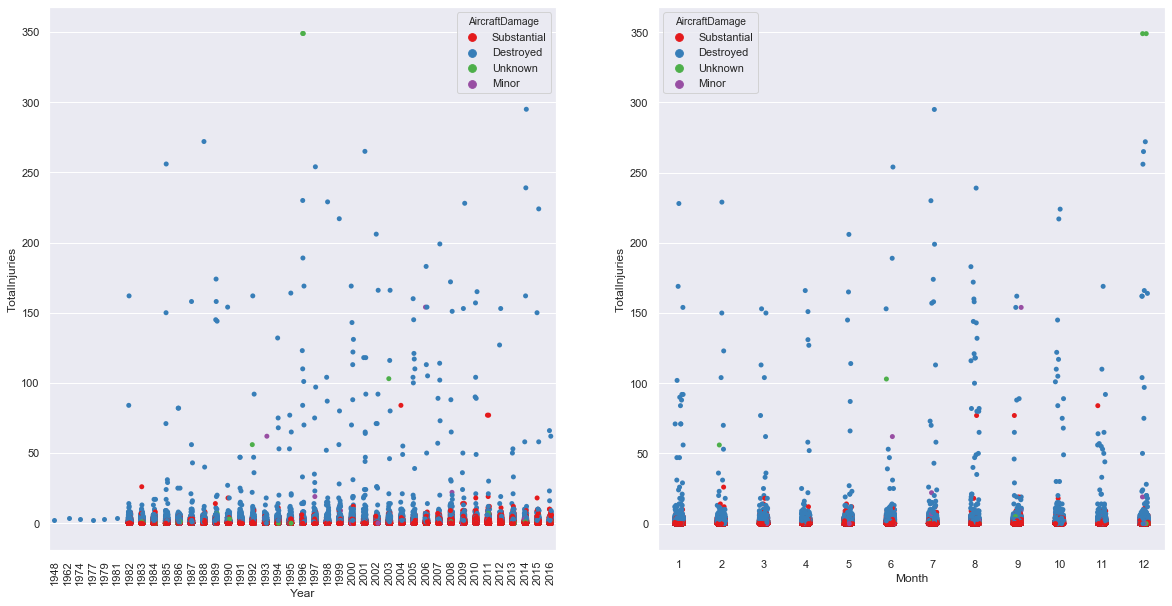

In [121]:
f, axes = plt.subplots(1, 2, figsize=(20,10))

year = sb.stripplot(x="Year",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[0])
year.set_xticklabels(year.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[1])

### Line plots showing total injuries over time

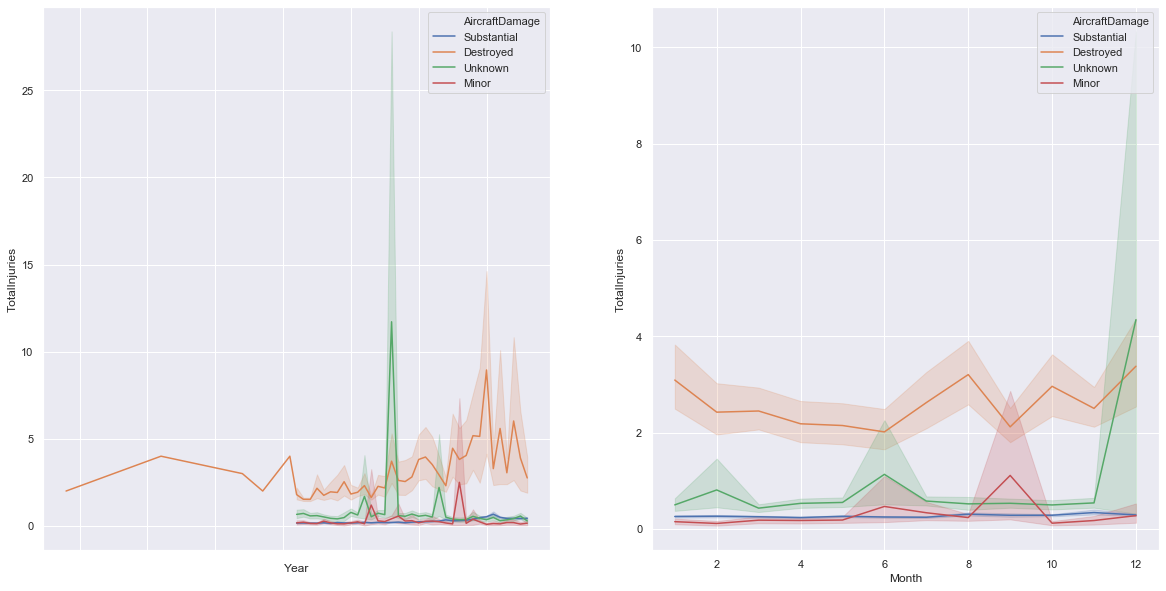

In [118]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
year = sb.lineplot(x="Year", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[0])
year.set_xticklabels(year.get_xticklabels(),rotation=90)
sb.lineplot(x="Month", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[1])

### Grouping investigation types with weather conditions

In [101]:
pd.DataFrame(aviation.groupby(['WeatherCondition', 'InvestigationType']).size())

0
WeatherCondition InvestigationType       
IMC              Accident            5412
                 Incident             243
UNK              Accident            2274
                 Incident             822
VMC              Accident           68295
                 Incident            2095

### Grouping investigation types with engine types

In [102]:
pd.DataFrame(aviation.groupby(['EngineType', 'InvestigationType']).size())

0
EngineType       InvestigationType       
Electric         Accident               2
Hybrid Rocket    Accident               1
None             Accident               6
REC, ELEC        Accident               1
REC, TJ, REC, TJ Accident               1
REC, TJ, TJ      Accident               2
Reciprocating    Accident           63872
                 Incident             608
TF, TJ           Accident               3
TJ, REC, REC, TJ Accident               1
Turbo Fan        Accident            1230
                 Incident             990
Turbo Jet        Accident             440
                 Incident             238
Turbo Prop       Accident            2606
                 Incident             423
Turbo Shaft      Accident            3186
                 Incident             118
Unknown          Accident            4630
                 Incident             783

### Grouping investigation type, weather condition by engine type

In [103]:
pd.DataFrame(aviation.groupby(['EngineType', 'WeatherCondition', 'InvestigationType']).size())

0
EngineType       WeatherCondition InvestigationType       
Electric         VMC              Accident               2
Hybrid Rocket    VMC              Accident               1
None             VMC              Accident               6
REC, ELEC        VMC              Accident               1
REC, TJ, REC, TJ IMC              Accident               1
REC, TJ, TJ      IMC              Accident               1
                 VMC              Accident               1
Reciprocating    IMC              Accident            4217
                                  Incident              24
                 UNK              Accident             827
                                  Incident              12
                 VMC              Accident           58828
                                  Incident             572
TF, TJ           UNK              Accident               1
                 VMC              Accident               2
TJ, REC, REC, TJ VMC              Accident               1
Turbo Fan        IMC              Accident             222
                                  Incident             107
                 UNK              Accident              80
                                  Incident             173
                 VMC              Accident             928
                                  Incident             710
Turbo Jet        IMC              Accident              72
                                  Incident              36
                 UNK              Accident              19
                                  Incident              10
                 VMC              Accident             349
                                  Incident             192
Turbo Prop       IMC              Accident             433
                                  Incident              52
                 UNK              Accident              68
                                  Incident              28
                 VMC              Accident            2105
                                  Incident             343
Turbo Shaft      IMC              Accident             217
                                  Incident               3
                 UNK              Accident              86
                                  Incident               8
                 VMC              Accident            2883
                                  Incident             107
Unknown          IMC              Accident             249
                                  Incident              21
                 UNK              Accident            1193
                                  Incident             591
                 VMC              Accident            3188
                                  Incident             171